In [1]:
import rspy as rsp
import numpy as np

In [2]:
rsp.setSystemWarning(off=True)

# Env Check

In [3]:
import platform
platform.python_version()

'3.7.6'

In [4]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [5]:
print("버전: ", tf.__version__)
print("즉시 실행 모드: ", tf.executing_eagerly())
print("GPU ", "사용 가능" if tf.test.is_gpu_available() else "사용 불가능")

버전:  1.15.0
즉시 실행 모드:  False
GPU  사용 불가능


In [6]:
tf.test.gpu_device_name()

''

In [7]:
tf.config.experimental.get_visible_devices("GPU")

[]

## simple execute tensorflow

In [8]:
a = 2
b = 3

In [9]:
c = tf.add(a, b, name="Add")
rsp.showMulti(a, b, c)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [10]:
sess = tf.Session()

In [11]:
sess.run(c)

5

In [12]:
sess.close()

# Computation Graph

In [13]:
a, b = 15, 5
gop = a * b
hap = a + b
dap = gop / hap

In [14]:
dap

3.75

In [15]:
# create graph
a = tf.constant(15)
b = tf.constant(5)
gop = tf.multiply(a, b)
hap = tf.add(a, b)
dap = tf.divide(gop, hap)

In [16]:
# Launch the graph in a session
sess = tf.Session()
rsp.showMulti(a, sess.run(a), sess.run(dap),  sess.run([a, b, gop, hap, dap]))

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [17]:
# Close the session
sess.close()

## Variables & Update

In [18]:
c = tf.constant(0)

with tf.Session() as sess:
    try:
        assign = tf.assign(c, gop)
    except:
        print("error")

error


In [19]:
c = tf.Variable(0)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(c))
    
    assign = tf.assign(c, gop)
    sess.run(assign)
    print(sess.run(c))

0
75


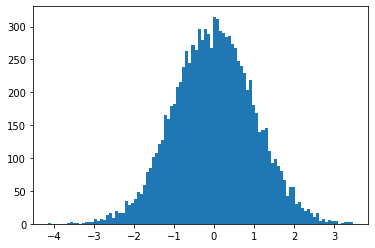

In [20]:
data = np.random.normal(loc=0, scale=1, size=10000)
import matplotlib.pyplot as plt
plt.hist(data, bins=100)
plt.show()

In [21]:
w = tf.Variable(np.random.normal(size=[2, 2]))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(w))

[[ 0.76322632  0.62555258]
 [-1.27838854  0.36050754]]


## Placeholder & Feed

In [22]:
# create graph
with tf.name_scope("basic_tensorflow"):
    a = tf.constant(15, name="variable_a")
    b = tf.placeholder(tf.int32, [1], name="variable_b")
    gop = tf.multiply(a, b, name="gop")
    hap = tf.add(a, b, name="hap")
    dap = tf.divide(gop, hap, name="dap")

In [23]:
with tf.Session() as sess:
    for i in range(10):
        print(f"{i} >> {sess.run(dap, feed_dict={b: [i]})}")

0 >> [0.]
1 >> [0.9375]
2 >> [1.76470588]
3 >> [2.5]
4 >> [3.15789474]
5 >> [3.75]
6 >> [4.28571429]
7 >> [4.77272727]
8 >> [5.2173913]
9 >> [5.625]


# TensorBoard

In [24]:
#tensorboard --logdir=/tensorboard/0102 --bind_all
writer = tf.summary.FileWriter('/tensorboard/0102', tf.get_default_graph())

In [25]:
writer.close

<bound method FileWriter.close of <tensorflow.python.summary.writer.writer.FileWriter object at 0x7fe8d45e6f90>>